In [1]:
import pandas as pd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Steup data frame and dates for daily precipitation data by year
year = 2020
df = pd.DataFrame(columns=['station'])
dts = pd.date_range(str(year) + "-01-01", str(year) + "-12-31", freq="D")

In [3]:
# Retrieve precipitation data for year and merge into dataframe
for dt in dts:
    d = str(dt.date())
    dt_df = pd.read_csv(f'outputs/prcp/{year}/csv/{d}.csv')
    df = df.merge(dt_df, on='station', how='outer')

In [4]:
# Add Station Information to Dataframe
stn_df = pd.read_csv(f'outputs/prcp/{year}/CA_{year}_coords.csv')
df = df.merge(stn_df, on='station')
df

,station,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,...,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,lat,lon,elev,name
0,US1CAAL0001,0.0,0.0,0.0,1.3,0.0,0.0,0.0,1.0,6.4,...,9.1,0.0,1.5,0.0,0.0,5.8,37.8123,-122.2160,113.4,CA PIEDMONT 1.0 SE
1,US1CAAL0003,0.0,0.0,0.0,0.5,0.0,0.0,0.0,1.3,4.6,...,1.8,0.0,1.8,0.0,0.0,4.6,37.7169,-122.0585,163.4,CA CASTRO VALLEY 0.4 NNE
2,US1CAAL0004,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.5,3.6,...,3.6,0.5,1.3,0.0,0.0,1.8,37.6483,-121.8745,107.0,CA PLEASANTON 1.8 SSE
3,US1CAAL0006,NaN,NaN,NaN,0.5,NaN,NaN,NaN,0.3,5.6,...,7.1,NaN,1.5,NaN,NaN,4.8,37.8319,-122.2503,58.2,CA OAKLAND 4.4 NNW
4,US1CAAL0012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,1.5,...,0.8,0.0,1.8,0.0,0.0,1.3,37.6702,-121.8814,104.9,CA PLEASANTON 0.4 ESE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,USW00093241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.9,...,0.5,0.0,1.8,0.0,1.0,0.0,38.3775,-121.9586,31.7,CA VACAVILLE/NUT TREE AP ASOS
1179,USW00093242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.9,...,0.0,1.8,0.0,0.0,0.0,0.0,36.9850,-120.1106,76.5,CA MADERA MUNI AP
1180,USW00093243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.7,...,0.0,0.0,0.8,0.0,0.0,1.5,37.2381,-120.8825,23.8,CA MERCED 23 WSW CRN
1181,USW00093245,0.0,0.0,0.0,3.1,0.0,0.0,0.4,0.8,8.3,...,0.0,0.0,0.0,0.0,3.9,0.0,38.3208,-123.0747,19.2,CA BODEGA 6 WSW CRN


In [5]:
date_columns = df.columns[1:366]  # Adjust this if necessary

# Convert the daily columns to numeric (if they are not already)
df[date_columns] = df[date_columns].apply(pd.to_numeric, errors='coerce')

# Initialize a dictionary to hold the monthly data
monthly_data = {}

# Iterate over each station
for station in df.index:
    monthly_totals = []
    for month in range(1, 13):
        # Generate the date range for the current month
        days_in_month = pd.date_range(f'2020-{month:02d}-01', periods=31)  # Adjust periods for different months if necessary
        days_in_month = days_in_month[days_in_month.month == month]  # Ensure only the current month is included
        
        # Find the corresponding columns in the DataFrame
        daily_columns = [col for col in df.columns if col in days_in_month.strftime('%Y-%m-%d')]
        
        # Sum the daily values for the current month
        monthly_total = df.loc[station, daily_columns].sum()
        monthly_totals.append(monthly_total)
    
    monthly_data[station] = monthly_totals

# Create a new DataFrame with the monthly totals
monthly_df = pd.DataFrame(monthly_data, index=[f'2020-{month:02d}' for month in range(1, 13)]).T

# Add the metadata columns back to the new DataFrame
metadata_columns = ['lat', 'lon', 'elev', 'name']  # Adjust this list based on your actual DataFrame
monthly_df = pd.concat([monthly_df, df[metadata_columns]], axis=1)

# Remove rows with NaN values
monthly_df = monthly_df.dropna()

# Sum each month
monthly_sums2020 = monthly_df.sum(axis=0)

# Display the resulting DataFrame and the monthly sums
print(monthly_df)
print(monthly_sums2020)

      2020-01  2020-02  2020-03  2020-04  2020-05  2020-06  2020-07  2020-08  \
0        73.6      0.0     16.0     35.1     18.9      0.0      0.0      0.0   
1        56.8      0.0     55.9     40.4     25.2      0.0      0.0      2.6   
2        31.4      0.0     78.1     37.3     24.4      0.0      0.0      0.0   
3        62.7      0.0      6.4     26.2     22.4      0.0      0.0      0.0   
4        29.3      0.0     69.9     61.5     23.9      0.0      0.0      5.3   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1178     33.6      0.0      0.5      0.0      0.0      0.0      0.0      0.0   
1179     16.3      0.0     39.0     34.9      5.3      0.0      0.0      0.0   
1180     17.6      0.0     38.2     23.7      2.6      0.0      0.0      0.0   
1181     74.5      0.0     40.3     16.5     28.7      0.4      0.2      1.7   
1182     45.8      3.6     53.2     28.0     32.1     12.2      0.0      3.0   

      2020-09  2020-10  2020-11  2020-1

In [6]:
# Select only the monthly columns (assuming the last few columns are metadata and not needed here)
monthly_sums2020 = monthly_sums2020.iloc[:12]

# Create a dictionary to map month numbers to abbreviations
month_mapping = {
    '2020-01': 'Jan', '2020-02': 'Feb', '2020-03': 'Mar', '2020-04': 'Apr',
    '2020-05': 'May', '2020-06': 'Jun', '2020-07': 'Jul', '2020-08': 'Aug',
    '2020-09': 'Sep', '2020-10': 'Oct', '2020-11': 'Nov', '2020-12': 'Dec'
}

# Rename the Series index using the month mapping
monthly_sums2020.index = monthly_sums2020.index.map(month_mapping)

# Convert millimeters to inches and round to 2 decimal places
monthly_sums2020 = (monthly_sums2020 * 0.0393701).round(2)

monthly_sums2020

Jan    2287.930369
Feb     219.559174
Mar    3567.159407
Apr     2612.10771
May    1411.646432
Jun     144.567007
Jul      33.610254
Aug      68.519722
Sep      51.921288
Oct      61.877986
Nov    1412.071629
Dec    2278.308317
dtype: object

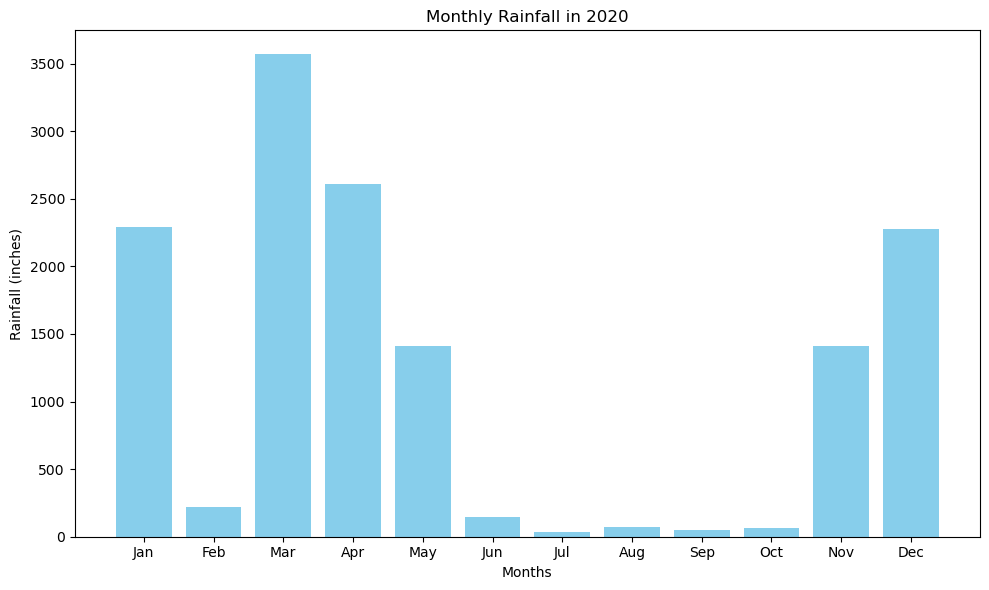

In [8]:
# Extract months and rainfall values from monthly_sums2020
months = list(monthly_sums2020.index)
rainfall_values = list(monthly_sums2020.values)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(months, rainfall_values, color='skyblue')

# Add labels and title
plt.xlabel('Months')
plt.ylabel('Rainfall (inches)')
plt.title('Monthly Rainfall in 2020')

# Adjust layout for better appearance
plt.tight_layout()

# Ensure output directory exists
output_path = Path("outputs")
os.makedirs(output_path, exist_ok=True)

# Save the plot as an image file in the "outputs" folder
output_file = output_path / "Monthly_Rainfall_2020.png"
plt.savefig(output_file)

# Show the plot (optional)
plt.show()